In [1]:
import src.struc2vec  as s2v
import networkx as nx
from gensim.models import Word2Vec
import numpy as np
from sklearn.decomposition import PCA

In [2]:
# Construct graph
G = nx.barbell_graph(20, 5)

In [3]:
# Create s2v graph object
s2vG = s2v.struc2vec(G)

In [56]:
# Make 3 layer ml graph
s2vG.getMultiLevelGraph(3)

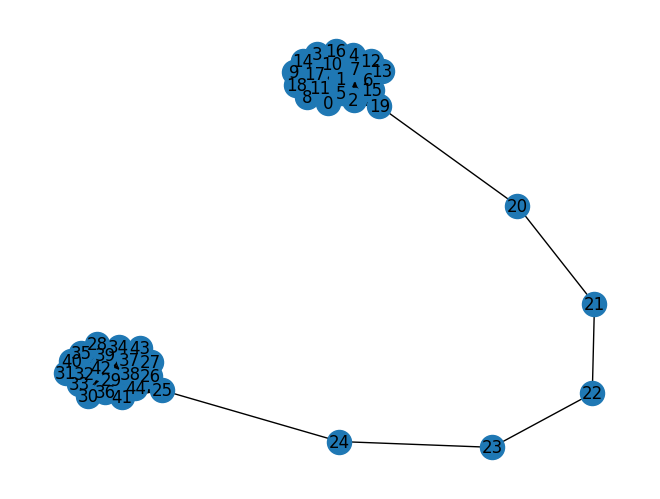

In [57]:
nx.draw_spring(s2vG.G, with_labels=True)

In [58]:
walks = s2vG.getRandomWalks(number_of_walks = 1000, walk_length=40)

In [59]:
model = Word2Vec(walks, vector_size=50)

In [60]:
embeddings = {node: model.wv[node] for node in s2vG.nodes}

In [61]:
X = np.array(list(embeddings.values()))

In [62]:
pca = PCA(n_components=3)
X_transform = pca.fit_transform(X)

In [63]:
node_embeddings = {}
for node, embedding in enumerate(X_transform):
    emb_list = list(embedding)
    index = emb_list.index(max(emb_list))
    node_embeddings[node] = index

In [64]:
cmap = {0:"green",1:"yellow", 2:"red"}
nodecolors = [cmap[v] for k,v in node_embeddings.items()]

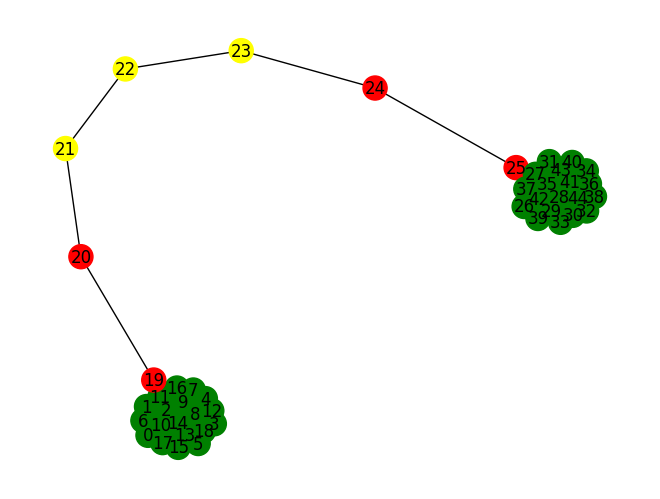

In [65]:
nx.draw_spring(s2vG.G, with_labels=True, node_color=nodecolors)